In [2]:
from google.colab import files
uploadtrain =  files.upload()

Saving label_training.txt to label_training.txt
Saving training.txt to training.txt


In [5]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(io.BytesIO(uploadtrain['training.txt']), sep = '\s+', header = None)
df.columns = ['Info_id', 'feature_id', 'value']
df.head()

,Info_id,feature_id,value
0,1,6,1.0
1,1,160,31.0
2,1,438,1.0
3,1,479,1.0
4,1,618,1.0


In [9]:
df1 = pd.read_csv(io.BytesIO(uploadtrain['label_training.txt']), header = None)
df1.columns = ['labels']
df1.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [10]:
mat = pd.pivot_table(df, index = 'Info_id', columns = 'feature_id', values = 'value')
mat = mat.fillna(0)
mat.head()

feature_id,2,3,4,5,6,8,10,12,15,21,22,23,25,26,27,28,29,31,33,36,38,39,41,42,44,51,52,53,56,63,64,65,66,72,76,78,80,83,85,89,...,26299,26300,26302,26304,26305,26308,26309,26310,26312,26313,26315,26316,26318,26319,26320,26321,26322,26326,26327,26332,26334,26335,26336,26337,26338,26339,26340,26344,26348,26349,26350,26351,26352,26354,26355,26356,26357,26360,26362,26364
Info_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.decomposition import PCA
#mat1 = train.drop(['labels'], axis=1)
pca = PCA(n_components=100)
fit = pca.fit_transform(mat)
mat_df = pd.DataFrame(data = fit)

In [12]:
mat1 = pd.merge(mat_df, df1, left_index = True, right_index=True)
mat1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,labels
0,-34.286615,-12.721954,66.547243,38.600362,44.198061,-16.080071,30.154205,-7.114675,-25.047078,8.155958,36.013310,25.962917,32.911562,-5.543206,-0.758582,-6.420062,19.325942,5.741185,-45.049201,43.364403,-40.683237,-8.138507,9.140811,-24.692235,18.336739,68.765499,-7.986162,-23.684914,-39.059662,16.464650,0.919202,31.852778,-22.103665,-7.417009,20.573721,-4.419120,-3.562485,-36.411188,-60.857750,0.879319,...,-1.196189,0.128982,1.395373,-1.012214,-0.160129,-0.836539,0.123451,-0.178894,-0.713576,0.551767,-0.585268,0.851840,0.889196,-1.896214,0.243231,-0.100702,0.913123,0.492331,-1.080186,-0.058452,-0.379209,0.780724,1.161113,0.022235,-0.312555,-0.685704,-0.736792,-0.341927,1.279271,1.730994,-0.659281,0.087119,0.093239,-0.362409,-0.041796,-1.525102,-0.293387,1.059324,-0.526384,1
1,23.901116,-22.975198,-68.809828,-2.183722,14.823012,-38.260772,-32.259866,31.603368,28.485574,-17.838115,2.508111,-41.097644,23.641177,-16.739122,3.646941,53.515177,37.923851,-16.156619,0.789810,7.245697,9.532312,46.518038,43.819888,-57.830605,-4.061133,9.484703,-28.908007,23.975313,16.616407,24.173809,-37.510419,35.415749,-21.983527,-18.591174,30.861683,8.625289,0.040626,8.102063,18.702834,-8.226593,...,0.447878,-0.279374,0.860252,-0.438208,-0.099710,1.542306,2.508901,-0.808254,-1.649182,-0.459317,-0.169211,1.159750,-0.557641,-0.069093,0.014920,0.146048,0.343760,-0.224871,-0.120654,-0.464345,-0.714813,-0.377206,0.065316,0.573782,-0.815425,-0.383458,-0.443723,0.839174,-0.319742,-0.166813,0.777894,-1.322443,0.906573,0.068153,1.463474,-1.468209,-1.707236,0.436373,-3.104828,1
2,16.071592,-32.588397,37.704559,53.023685,21.358713,-24.571468,-49.949174,-23.518261,-47.424870,-16.332495,83.105093,19.084792,-32.114304,-23.101705,1.052174,55.688575,-19.891466,-24.519777,-39.875351,29.746537,20.978377,-31.901999,-16.203814,-43.617110,39.286925,6.229675,-31.570592,5.353984,23.498689,14.432442,17.969991,29.306188,-37.988258,-4.284061,5.852345,-11.093709,1.273203,-12.002374,11.905219,19.342088,...,-0.080161,-0.550612,-1.886824,-0.601653,0.387662,1.932967,-0.484340,-0.072898,0.742273,-0.538507,0.496672,-1.316610,-0.205372,1.239083,0.194725,0.350168,-0.081652,-0.373592,0.681914,0.422342,0.722987,-0.614302,-1.001626,0.871411,0.119884,0.109242,-0.861111,0.174444,-0.403066,-0.217529,-0.504359,-0.605494,0.717447,0.002598,-0.005901,-0.290476,1.545559,0.346368,-0.109527,1
3,7.736907,-25.975390,37.202887,-7.463795,24.550725,-20.133819,-2.003962,5.738670,16.987992,24.182175,-0.843551,5.424937,-56.353170,-7.178428,-23.243953,30.951218,3.137014,36.122407,-36.815911,5.033386,27.972731,-15.622470,-33.549515,-16.778337,4.996819,-17.291664,-27.395690,-14.564795,-5.320009,31.466921,0.481222,7.142111,-8.102668,-26.653859,-26.479365,-2.165070,23.334173,-3.876824,1.740165,52.353137,...,-0.174741,-0.398824,-0.701740,1.223553,-0.292974,-0.453371,0.265475,-1.385701,1.347720,1.774229,-0.099887,0.399357,-0.121730,0.372918,0.113898,0.246296,0.496339,-1.172130,0.649730,0.598892,0.124885,0.735394,0.336042,-1.222736,-1.158680,0.017360,-1.058241,0.196135,-0.092996,0.309475,-0.118438,0.431151,0.329059,0.048853,0.535583,-0.260046,-0.450344,0.259346,0.998291,1
4,3.076045,-5.450483,-4.501322,-83.236003,-78.201476,-18.274651,-14.541837,26.240233,-2.269347,74.312457,25.970956,-4.632598,-6.532892,11.798272,34.648578,3.159208,17.775208,16.345217,-23.871294,-40.560748,-58.703020,21.061998,-33.578670,-1.802381,-24.204241,41.213498,21.116942,-43.481985,11.060396,2.628134,61.436101,39.089203,-2.715558,-24.492062,-14.058377,-41.607084,7.493554,22.782246,-29.662276,-11.818569,...,0.432088,-0.640117,-0.753401,-0.177162,-1.272039,1.197524,0.057259,1.002760,0.164116,-0.020906,-0.308172,-0.263501,-0.360404,-0.112536,-0.588068,-0.030467,0.595397,-0.486762,0.618969,0.867238,0.0173

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(mat1, test_size=0.2)

In [14]:
X = train.drop(['labels'], axis=1)
X.values

array([[-2.03904458e+01, -4.46496778e+01, -2.95148783e+01, ...,
         5.49971548e-01, -3.11378962e-01,  1.55398557e-01],
       [ 5.78659631e+01,  3.56968232e+01,  6.25739237e+00, ...,
        -5.58181881e-02,  3.01952599e-01, -1.24896283e+00],
       [-2.36635795e+01,  5.08789958e+01,  1.27697134e+01, ...,
        -2.06029394e+00, -7.41828256e-01,  1.73383990e+00],
       ...,
       [-3.02442193e+01,  1.22365355e+01, -2.45212734e+01, ...,
         4.61578196e-01,  5.54733575e-01, -2.93850478e-01],
       [-2.15292829e+01,  2.17268077e+01,  4.85489471e+01, ...,
         3.40284071e-01,  2.28703831e-01, -1.70436338e-02],
       [ 3.32698360e+01,  2.49929747e+01, -1.80212872e+00, ...,
        -5.75601193e-01, -6.21780350e-01,  4.57539383e-01]])

In [15]:
Y=train['labels']
Y.head()

1008   -1
827    -1
207     1
1401    1
1764   -1
Name: labels, dtype: int64

In [16]:
X1 = test.drop(['labels'], axis=1)
X1.values

array([[-3.96317329e+01,  6.38685963e+00, -2.34608880e+01, ...,
        -4.58662218e-02,  6.57854762e-01,  1.67297308e-01],
       [ 2.72080463e+01,  1.65573613e+01,  2.40955051e+01, ...,
        -6.50525935e-01, -7.71780906e-01,  8.51132955e-01],
       [-2.31116501e+01,  5.85668832e+01, -8.13698787e+00, ...,
         1.63701211e-01, -3.90760449e-01,  1.59716345e-01],
       ...,
       [ 7.73690674e+00, -2.59753896e+01,  3.72028872e+01, ...,
        -4.50343873e-01,  2.59345558e-01,  9.98290993e-01],
       [-5.58368695e+00, -9.57889210e+00,  5.89895146e+01, ...,
        -3.34520857e-01, -1.65611896e-01,  2.42514071e-01],
       [ 2.15747944e+00,  1.35993700e+00,  2.56109586e+01, ...,
         5.81212233e-01, -1.82900297e+00,  3.59441991e+00]])

In [17]:
Y1 = test['labels']
Y1

934     1
664     1
577    -1
1371    1
748     1
       ..
215     1
1329    1
3       1
707     1
686    -1
Name: labels, Length: 369, dtype: int64

In [18]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
numBaseClassifiers = 500
maxdepth = 3
clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X, Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [19]:
predY = clf.predict(X1)
predY

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
        1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,
        1,  1, -1, -1,  1

In [0]:
predictions = pd.concat([pd.Series(Y1.values,name='Actual Class'),pd.Series(predY,name='Predicted Class')], axis=1)

In [21]:
predictions.tail()

,Actual Class,Predicted Class
364,1,1
365,1,1
366,1,1
367,1,1
368,-1,-1


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions['Actual Class'], predictions['Predicted Class'])

0.8373983739837398

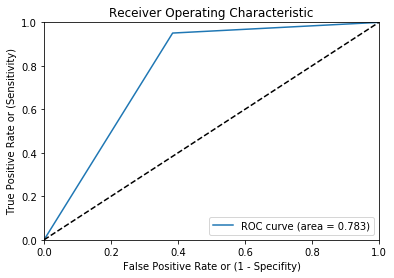

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr,tpr, thresholds = roc_curve(predictions['Actual Class'].values, predictions['Predicted Class'].values)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

0.9622711451809618

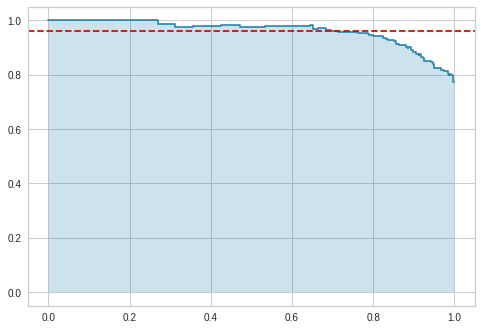

In [25]:

from yellowbrick.classifier import ClassPredictionError, ClassificationReport, ROCAUC, PrecisionRecallCurve, ConfusionMatrix
viz = PrecisionRecallCurve(clf)
viz.fit(X, Y)
viz.score(X1,Y1)

0.8401084010840109

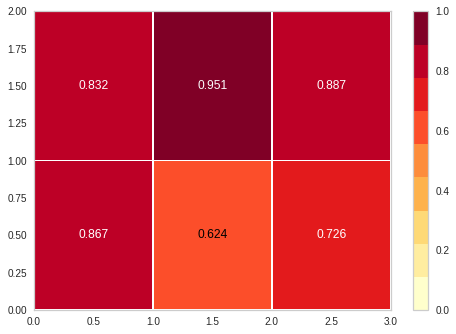

In [26]:
viz = ClassificationReport(clf)
viz.fit(X, Y)
viz.score(X1,Y1)